In [ ]:
!pip install easyocr

     |████████████████████████████████| 63.6 MB 45 kB/s 
     |████████████████████████████████| 37.1 MB 1.2 MB/s 


In [ ]:
# load example images
!npx degit JaidedAI/EasyOCR/examples -f

npx: installed 1 in 2.205s
> destination directory is not empty. Using --force, continuing
> cloned JaidedAI/EasyOCR#HEAD


In [ ]:
# list them
!ls -l

total 3508
-rw-r--r-- 1 root root   59898 Oct 15 02:56 chinese.jpg
-rw-r--r-- 1 root root   97910 Oct 15 02:56 easyocr_framework.jpeg
-rw-r--r-- 1 root root 1740957 Oct 15 02:56 english.png
-rw-r--r-- 1 root root  487995 Oct 15 02:56 example2.png
-rw-r--r-- 1 root root  127454 Oct 15 02:56 example3.png
-rw-r--r-- 1 root root  488641 Oct 15 02:56 example.png
-rw-r--r-- 1 root root  168376 Oct 15 02:56 french.jpg
-rw-r--r-- 1 root root   42159 Oct 15 02:56 japanese.jpg
-rw-r--r-- 1 root root  225531 Oct 15 02:56 korean.png
drwxr-xr-x 1 root root    4096 Oct  8 13:45 sample_data
-rw-r--r-- 1 root root   82229 Oct 15 02:56 thai.jpg
-rw-r--r-- 1 root root   34706 Oct 15 02:56 width_ths.png


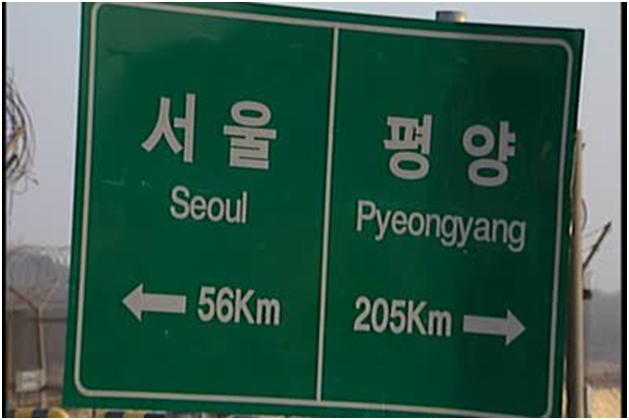

In [ ]:
# show an image
import PIL
from PIL import ImageDraw
im = PIL.Image.open("korean.png")
im

In [ ]:
# Create a reader to do OCR.
# If you change to GPU instance, it will be faster. But CPU is enough.
# (by MENU > Runtime > Change runtime type > GPU, then redo from beginning )
import easyocr
reader = easyocr.Reader(['ko','en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [ ]:
# Doing OCR. Get bounding boxes.
bounds = reader.readtext('korean.png')
bounds

[([[129, 79], [292, 79], [292, 183], [129, 183]], '서울', 0.7705982032821547),
 ([[368, 101], [531, 101], [531, 201], [368, 201]], '평 양', 0.9980085492134094),
 ([[159, 176], [258, 176], [258, 232], [159, 232]],
  'Seoul',
  0.8036718725557735),
 ([[342, 189], [539, 189], [539, 262], [342, 262]],
  'Pyeongyang',
  0.9545740018074094),
 ([[186, 276], [289, 276], [289, 333], [186, 333]],
  '56Km',
  0.32002943754196167),
 ([[344, 288], [461, 288], [461, 344], [344, 344]],
  '2O5Km',
  0.7913503019201789)]

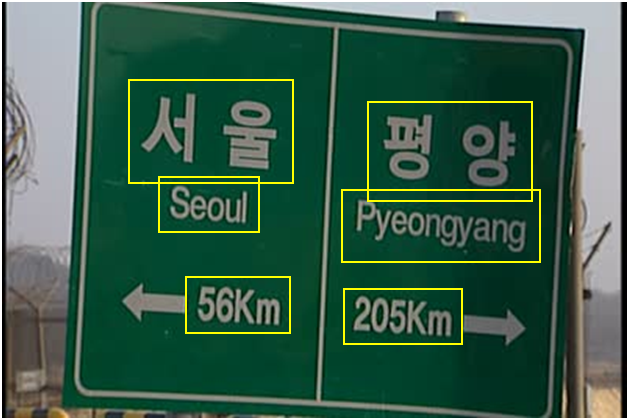

In [ ]:
# Draw bounding boxes
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)